In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
cancer_df = pd.read_csv('/content/drive/MyDrive/KDT 시즌2/8. 머신러닝과 딥러닝/data/treatment_response_development.csv')
cancer_df

,Unnamed: 0,index,ID,Age,Sex,Tumor_type,Differentiation_grade,T_stage,N_stage,M_stage,Survival_time_days,Overall_stage,Smoking,Weight_loss_percent,Tumor_location,Complete_response_probability
0,0,1202,acdb4a0d-b69e-4cbb-a0d3-653e98a34605,75.0,M,adenocarcinoma,G2,T3,N1,M0,584.147315,III,None,2.459183,Distal,0.181456
1,1,485,137905fa-edeb-4bc5-9d23-13944afa098c,72.0,M,squamous cell carcinoma,G3,T3,N1,M0,958.434140,NaN,Rarely,5.680663,Distal,0.403759
2,2,698,8c978f41-bff2-4be0-bac5-99aa3c269b5e,69.0,F,adenocarcinoma,Gx,T3,N3,M0,83.845493,III,Yes,4.546695,Middle,0.249800
3,3,946,7de6fe41-c467-4584-a4fa-cfa9dca6f809,59.0,M,adenocarcinoma,Gx,T3,N1,M0,989.459377,III,None,2.652578,Distal,0.196882
4,4,928,2e00d074-73d5-4876-b0c3-15cc4dd0f2a5,70.0,M,squamous cell carcinoma,G3,T3,N1,M0,632.626430,III,Yes,0.611969,Distal,0.387280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1230,519,665fdeda-26dd-476c-8eee-b252810a0f91,50.0,M,adenocarcinoma,G2,T3,N1,M0,232.430218,III,None,1.404500,Middle,0.185106
1231,1231,1178,2a6d613a-30eb-41e2-8bd5-4439c4e0601b,73.0,M,adenocarcinoma,G3,T3,N0,M0,815.206109,II,Yes,1.637339,Junction,0.254839
1232,1232,175,f4e0e7d5-d188-4dbf-8199-f91a0d145903,60.0,M,adenocarcinoma,G3,T3,N2,M0,390.430146,III,Yes,3.527351,Distal,0.239576
1233,1233,210,20ea725f-df59-4d8e-adc9-acbe6edc2eaa,73.0,M,squamous cell carcinoma,G2,T2,N1,M0,455.964240,II,None,1.387599,Junction,0.464134


In [ ]:
cancer_df.head()

,Unnamed: 0,index,ID,Age,Sex,Tumor_type,Differentiation_grade,T_stage,N_stage,M_stage,Survival_time_days,Overall_stage,Smoking,Weight_loss_percent,Tumor_location,Complete_response_probability
0,0,1202,acdb4a0d-b69e-4cbb-a0d3-653e98a34605,75.0,M,adenocarcinoma,G2,T3,N1,M0,584.147315,III,None,2.459183,Distal,0.181456
1,1,485,137905fa-edeb-4bc5-9d23-13944afa098c,72.0,M,squamous cell carcinoma,G3,T3,N1,M0,958.434140,NaN,Rarely,5.680663,Distal,0.403759
2,2,698,8c978f41-bff2-4be0-bac5-99aa3c269b5e,69.0,F,adenocarcinoma,Gx,T3,N3,M0,83.845493,III,Yes,4.546695,Middle,0.249800
3,3,946,7de6fe41-c467-4584-a4fa-cfa9dca6f809,59.0,M,adenocarcinoma,Gx,T3,N1,M0,989.459377,III,None,2.652578,Distal,0.196882
4,4,928,2e00d074-73d5-4876-b0c3-15cc4dd0f2a5,70.0,M,squamous cell carcinoma,G3,T3,N1,M0,632.626430,III,Yes,0.611969,Distal,0.387280


In [ ]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     1235 non-null   int64  
 1   index                          1235 non-null   int64  
 2   ID                             1220 non-null   object 
 3   Age                            1225 non-null   float64
 4   Sex                            1201 non-null   object 
 5   Tumor_type                     1191 non-null   object 
 6   Differentiation_grade          1235 non-null   object 
 7   T_stage                        1235 non-null   object 
 8   N_stage                        1235 non-null   object 
 9   M_stage                        1235 non-null   object 
 10  Survival_time_days             1235 non-null   float64
 11  Overall_stage                  1144 non-null   object 
 12  Smoking                        1235 non-null   o

* 0. 순번
* 1. 인덱스
* 2. 환자 ID: 각 환자의 고유 식별자
* 3. 나이: 환자의 나이
* 4. 성별: 환자의 성별
* 5. 종양 유형: 종양의 조직학적 결과
* 6. 종양 분화 등급(Tumor Differentiation Grade): 종양 세포가 얼마나 잘 분화되는지에 대한 척도
* 7. 암 T단계: 종양의 발달 단계를 설명
* 8. 암 N단계: 림프절이 영향을 받는 정도를 평가
* 9. 암 M 단계: 전이의 진행을 평가
* 10. 생존 시간(일): 진단부터 치료까지의 기간
* 11. 전반적인 암 단계: 전반적인 단계 평가
* 12. 흡연 상태: 환자의 흡연 상태
* 13. 체중 감량(%): 체중 감량 비율
* 14. 종양 위치: 종양의 위치
* 15. 완전 반응 확률

In [ ]:
cancer_df.drop('Unnamed: 0', axis=1, inplace=True)
cancer_df

,index,ID,Age,Sex,Tumor_type,Differentiation_grade,T_stage,N_stage,M_stage,Survival_time_days,Overall_stage,Smoking,Weight_loss_percent,Tumor_location,Complete_response_probability
0,1202,acdb4a0d-b69e-4cbb-a0d3-653e98a34605,75.0,M,adenocarcinoma,G2,T3,N1,M0,584.147315,III,None,2.459183,Distal,0.181456
1,485,137905fa-edeb-4bc5-9d23-13944afa098c,72.0,M,squamous cell carcinoma,G3,T3,N1,M0,958.434140,NaN,Rarely,5.680663,Distal,0.403759
2,698,8c978f41-bff2-4be0-bac5-99aa3c269b5e,69.0,F,adenocarcinoma,Gx,T3,N3,M0,83.845493,III,Yes,4.546695,Middle,0.249800
3,946,7de6fe41-c467-4584-a4fa-cfa9dca6f809,59.0,M,adenocarcinoma,Gx,T3,N1,M0,989.459377,III,None,2.652578,Distal,0.196882
4,928,2e00d074-73d5-4876-b0c3-15cc4dd0f2a5,70.0,M,squamous cell carcinoma,G3,T3,N1,M0,632.626430,III,Yes,0.611969,Distal,0.387280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,519,665fdeda-26dd-476c-8eee-b252810a0f91,50.0,M,adenocarcinoma,G2,T3,N1,M0,232.430218,III,None,1.404500,Middle,0.185106
1231,1178,2a6d613a-30eb-41e2-8bd5-4439c4e0601b,73.0,M,adenocarcinoma,G3,T3,N0,M0,815.206109,II,Yes,1.637339,Junction,0.254839
1232,175,f4e0e7d5-d188-4dbf-8199-f91a0d145903,60.0,M,adenocarcinoma,G3,T3,N2,M0,390.430146,III,Yes,3.527351,Distal,0.239576
1233,210,20ea725f-df59-4d8e-adc9-acbe6edc2eaa,73.0,M,squamous cell carcinoma,G2,T2,N1,M0,455.964240,II,None,1.387599,Junction,0.464134


In [ ]:
cancer_df.describe()

,index,Age,Survival_time_days,Weight_loss_percent,Complete_response_probability
count,1235.0000,1225.000000,1235.000000,1235.000000,1235.000000
mean,617.0000,60.692245,677.096994,2.340518,0.277770
std,356.6581,12.021800,679.998828,1.803371,0.091676
min,0.0000,-65.000000,0.122343,0.010721,0.158318
25%,308.5000,54.000000,183.067675,0.917041,0.195351
50%,617.0000,61.000000,456.874229,2.028094,0.249800
75%,925.5000,68.000000,923.704741,3.415612,0.323064
max,1234.0000,94.000000,4750.029529,10.820060,0.635109


In [ ]:
cancer_df.drop(['index', 'ID'], axis=1, inplace=True)
cancer_df

,Age,Sex,Tumor_type,Differentiation_grade,T_stage,N_stage,M_stage,Survival_time_days,Overall_stage,Smoking,Weight_loss_percent,Tumor_location,Complete_response_probability
0,75.0,M,adenocarcinoma,G2,T3,N1,M0,584.147315,III,None,2.459183,Distal,0.181456
1,72.0,M,squamous cell carcinoma,G3,T3,N1,M0,958.434140,NaN,Rarely,5.680663,Distal,0.403759
2,69.0,F,adenocarcinoma,Gx,T3,N3,M0,83.845493,III,Yes,4.546695,Middle,0.249800
3,59.0,M,adenocarcinoma,Gx,T3,N1,M0,989.459377,III,None,2.652578,Distal,0.196882
4,70.0,M,squamous cell carcinoma,G3,T3,N1,M0,632.626430,III,Yes,0.611969,Distal,0.387280
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,50.0,M,adenocarcinoma,G2,T3,N1,M0,232.430218,III,None,1.404500,Middle,0.185106
1231,73.0,M,adenocarcinoma,G3,T3,N0,M0,815.206109,II,Yes,1.637339,Junction,0.254839
1232,60.0,M,adenocarcinoma,G3,T3,N2,M0,390.430146,III,Yes,3.527351,Distal,0.239576
1233,73.0,M,squamous cell carcinoma,G2,T2,N1,M0,455.964240,II,None,1.387599,Junction,0.464134


In [ ]:
cancer_df.sort_values('Age')

,Age,Sex,Tumor_type,Differentiation_grade,T_stage,N_stage,M_stage,Survival_time_days,Overall_stage,Smoking,Weight_loss_percent,Tumor_location,Complete_response_probability
160,-65.0,M,squamous cell carcinoma,G3,T3,N1,M0,334.716780,III,None,1.629154,Distal,0.404600
164,-61.0,M,adenocarcinoma,Gx,T3,N0,M0,167.877242,II,Yes,3.511891,Distal,0.183278
879,-54.0,M,adenocarcinoma,G2,T3,N0,M0,536.081650,II,None,2.149283,Distal,0.184894
558,32.0,M,adenocarcinoma,G3,T3,N2,M0,233.501227,III,Yes,1.143852,Distal,0.242101
934,34.0,M,adenocarcinoma,G2,T2,N2,M0,2168.276590,III,None,5.290373,Junction,0.302004
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,NaN,M,adenocarcinoma,G2,T3,N2,M0,411.812000,III,Rarely,1.162530,Junction,0.179508
1074,NaN,F,squamous cell carcinoma,G2,T3,N0,M0,171.161331,II,Yes,3.444963,Distal,0.388354
1120,NaN,M,squamous cell carcinoma,G3,T4,N2,M0,2579.139403,III,None,4.980797,Distal,0.384728
1141,NaN,F,adenocarcinoma,Gx,T3,N1,M0,152.632544,III,Yes,0.829515,Middle,0.246867


In [ ]:
cancer_df = cancer_df.dropna()
cancer_df

,Age,Sex,Tumor_type,Differentiation_grade,T_stage,N_stage,M_stage,Survival_time_days,Overall_stage,Smoking,Weight_loss_percent,Tumor_location,Complete_response_probability
0,75.0,M,adenocarcinoma,G2,T3,N1,M0,584.147315,III,None,2.459183,Distal,0.181456
2,69.0,F,adenocarcinoma,Gx,T3,N3,M0,83.845493,III,Yes,4.546695,Middle,0.249800
3,59.0,M,adenocarcinoma,Gx,T3,N1,M0,989.459377,III,None,2.652578,Distal,0.196882
4,70.0,M,squamous cell carcinoma,G3,T3,N1,M0,632.626430,III,Yes,0.611969,Distal,0.387280
5,50.0,M,squamous cell carcinoma,Gx,T3,N1,M0,1906.569453,III,None,0.597113,Distal,0.316505
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,50.0,M,adenocarcinoma,G2,T3,N1,M0,232.430218,III,None,1.404500,Middle,0.185106
1231,73.0,M,adenocarcinoma,G3,T3,N0,M0,815.206109,II,Yes,1.637339,Junction,0.254839
1232,60.0,M,adenocarcinoma,G3,T3,N2,M0,390.430146,III,Yes,3.527351,Distal,0.239576
1233,73.0,M,squamous cell carcinoma,G2,T2,N1,M0,455.964240,II,None,1.387599,Junction,0.464134


In [ ]:
cancer_df.sort_values('Age')

,Age,Sex,Tumor_type,Differentiation_grade,T_stage,N_stage,M_stage,Survival_time_days,Overall_stage,Smoking,Weight_loss_percent,Tumor_location,Complete_response_probability
160,-65.0,M,squamous cell carcinoma,G3,T3,N1,M0,334.716780,III,None,1.629154,Distal,0.404600
164,-61.0,M,adenocarcinoma,Gx,T3,N0,M0,167.877242,II,Yes,3.511891,Distal,0.183278
879,-54.0,M,adenocarcinoma,G2,T3,N0,M0,536.081650,II,None,2.149283,Distal,0.184894
558,32.0,M,adenocarcinoma,G3,T3,N2,M0,233.501227,III,Yes,1.143852,Distal,0.242101
389,34.0,F,adenocarcinoma,G3,T2,N0,M0,112.026584,I,Yes,3.223678,Distal,0.453014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,85.0,M,adenocarcinoma,G3,T3,N0,M0,1390.455485,II,Yes,0.453825,Distal,0.238254
193,90.0,M,adenocarcinoma,Gx,T2,N2,M0,1440.650320,III,None,0.588649,Distal,0.295564
325,90.0,M,adenocarcinoma,G2,T2,N1,M0,53.761409,II,None,5.520598,Distal,0.288386
980,93.0,M,adenocarcinoma,G3,T3,N0,M0,795.010266,II,None,4.227526,Distal,0.240570


In [ ]:
cancer_df['Age'] = cancer_df['Age'].astype(int)
cancer_df.sort_values('Age')

<ipython-input-28-3cacbe27f1ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancer_df['Age'] = cancer_df['Age'].astype(int)


,Age,Sex,Tumor_type,Differentiation_grade,T_stage,N_stage,M_stage,Survival_time_days,Overall_stage,Smoking,Weight_loss_percent,Tumor_location,Complete_response_probability
160,-65,M,squamous cell carcinoma,G3,T3,N1,M0,334.716780,III,None,1.629154,Distal,0.404600
164,-61,M,adenocarcinoma,Gx,T3,N0,M0,167.877242,II,Yes,3.511891,Distal,0.183278
879,-54,M,adenocarcinoma,G2,T3,N0,M0,536.081650,II,None,2.149283,Distal,0.184894
558,32,M,adenocarcinoma,G3,T3,N2,M0,233.501227,III,Yes,1.143852,Distal,0.242101
389,34,F,adenocarcinoma,G3,T2,N0,M0,112.026584,I,Yes,3.223678,Distal,0.453014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,85,M,adenocarcinoma,G3,T3,N0,M0,1390.455485,II,Yes,0.453825,Distal,0.238254
193,90,M,adenocarcinoma,Gx,T2,N2,M0,1440.650320,III,None,0.588649,Distal,0.295564
325,90,M,adenocarcinoma,G2,T2,N1,M0,53.761409,II,None,5.520598,Distal,0.288386
980,93,M,adenocarcinoma,G3,T3,N0,M0,795.010266,II,None,4.227526,Distal,0.240570


In [ ]:
cancer_df['Age'] = np.abs(cancer_df['Age'])
cancer_df.sort_values('Age')

<ipython-input-30-e7ad6a71b876>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancer_df['Age'] = np.abs(cancer_df['Age'])


,Age,Sex,Tumor_type,Differentiation_grade,T_stage,N_stage,M_stage,Survival_time_days,Overall_stage,Smoking,Weight_loss_percent,Tumor_location,Complete_response_probability
558,32,M,adenocarcinoma,G3,T3,N2,M0,233.501227,III,Yes,1.143852,Distal,0.242101
389,34,F,adenocarcinoma,G3,T2,N0,M0,112.026584,I,Yes,3.223678,Distal,0.453014
934,34,M,adenocarcinoma,G2,T2,N2,M0,2168.276590,III,None,5.290373,Junction,0.302004
1029,35,M,adenocarcinoma,G3,T3,N0,M0,308.368123,II,None,2.783600,Distal,0.246475
1139,35,M,adenocarcinoma,G3,T3,N0,M0,419.352082,II,None,4.379234,Distal,0.251346
...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,85,M,squamous cell carcinoma,G3,T3,N1,M0,402.213518,III,None,1.757638,Middle,0.389610
193,90,M,adenocarcinoma,Gx,T2,N2,M0,1440.650320,III,None,0.588649,Distal,0.295564
325,90,M,adenocarcinoma,G2,T2,N1,M0,53.761409,II,None,5.520598,Distal,0.288386
980,93,M,adenocarcinoma,G3,T3,N0,M0,795.010266,II,None,4.227526,Distal,0.240570


In [ ]:
cancer_df['Tumor_type'].value_counts()

adenocarcinoma             820
squamous cell carcinoma    245
adinocarcinoma               4
Name: Tumor_type, dtype: int64

In [ ]:
cancer_df['Differentiation_grade'].value_counts()

G2    424
G3    340
Gx    270
G1     29
X       6
Name: Differentiation_grade, dtype: int64

In [ ]:
cancer_df['T_stage'].value_counts()

T3    807
T2    213
T1     25
T4     24
Name: T_stage, dtype: int64

In [ ]:
cancer_df['N_stage'].value_counts()

N1    501
N0    344
N2    197
N3     27
Name: N_stage, dtype: int64

In [ ]:
cancer_df['M_stage'].value_counts()

M0    1066
M1       3
Name: M_stage, dtype: int64

In [ ]:
cancer_df['Overall_stage'].value_counts()

III    617
II     379
I       72
IV       1
Name: Overall_stage, dtype: int64

In [ ]:
cancer_df['Smoking'].value_counts()

None       665
Yes        274
Rarely     120
Unknown     10
Name: Smoking, dtype: int64

In [ ]:
cancer_df['Tumor_location'].value_counts()

Distal      749
Junction    171
Middle      149
Name: Tumor_location, dtype: int64

In [ ]:
cancer_df.drop('Smoking', axis=1, inplace=True)

<ipython-input-39-ccdabc8d28f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancer_df.drop('Smoking', axis=1, inplace=True)


In [ ]:
cancer_df = cancer_df.join(pd.get_dummies(cancer_df['Sex']))
cancer_df['F'] = cancer_df['F'].astype(int)
cancer_df['M'] = cancer_df['M'].astype(int)

In [ ]:
def diff_grade_num(row):
    if row['Differentiation_grade'] == 'G1':
        val = 1
    elif row['Differentiation_grade'] == 'G2':
        val = 2
    elif row['Differentiation_grade'] == 'G3':
        val = 3
    else:
        val = 0
    return val

def overall_stage_num(row):
    if row['Overall_stage'] == 'I':
        val = 1
    elif row['Overall_stage'] == 'II':
        val = 2
    elif row['Overall_stage'] == 'III':
        val = 3
    else:
        val = 4
    return val

cancer_df['Differentiation_grade_num'] = cancer_df.apply(diff_grade_num, axis=1)
cancer_df['Overall_stage_num'] = cancer_df.apply(overall_stage_num, axis=1)

In [ ]:
cancer_df

,Age,Sex,Tumor_type,Differentiation_grade,T_stage,N_stage,M_stage,Survival_time_days,Overall_stage,Weight_loss_percent,Tumor_location,Complete_response_probability,F,M,Differentiation_grade_num,Overall_stage_num
0,75,M,adenocarcinoma,G2,T3,N1,M0,584.147315,III,2.459183,Distal,0.181456,0,1,2,3
2,69,F,adenocarcinoma,Gx,T3,N3,M0,83.845493,III,4.546695,Middle,0.249800,1,0,0,3
3,59,M,adenocarcinoma,Gx,T3,N1,M0,989.459377,III,2.652578,Distal,0.196882,0,1,0,3
4,70,M,squamous cell carcinoma,G3,T3,N1,M0,632.626430,III,0.611969,Distal,0.387280,0,1,3,3
5,50,M,squamous cell carcinoma,Gx,T3,N1,M0,1906.569453,III,0.597113,Distal,0.316505,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,50,M,adenocarcinoma,G2,T3,N1,M0,232.430218,III,1.404500,Middle,0.185106,0,1,2,3
1231,73,M,adenocarcinoma,G3,T3,N0,M0,815.206109,II,1.637339,Junction,0.254839,0,1,3,2
1232,60,M,adenocarcinoma,G3,T3,N2,M0,390.430146,III,3.527351,Distal,0.239576,0,1,3,3
1233,73,M,squamous cell carcinoma,G2,T2,N1,M0,455.964240,II,1.387599,Junction,0.464134,0,1,2,2


In [ ]:
X = cancer_df[['Age', 'F', 'M', 'Differentiation_grade_num', 'Survival_time_days',
                     'Overall_stage_num', 'Weight_loss_percent']]
Y = cancer_df['Complete_response_probability']

X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.2, random_state=2024)

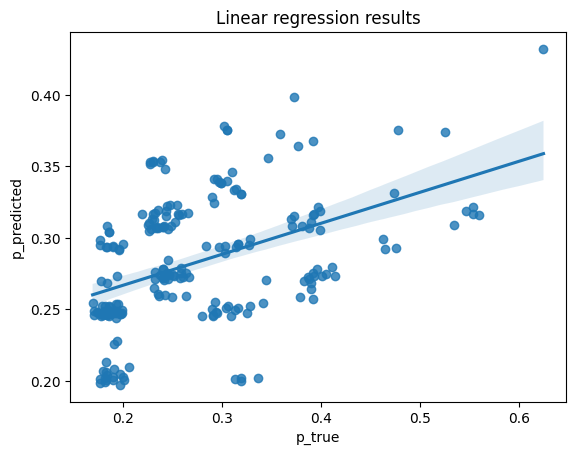

R2: 0.18539697604275895, MSE: 0.006789815951268871


In [ ]:
reg = LinearRegression().fit(np.array(X_train), y_train) # model fitting
y_test_predictions = reg.predict(np.array(X_test)) # getting the outcomes

# results presentation: regression plot and performance scores
sns.regplot(x = y_test, y = y_test_predictions)
plt.xlabel('p_true')
plt.ylabel('p_predicted')
plt.title('Linear regression results')
plt.show()

print ('R2: {}, MSE: {}'.format(r2_score(y_test, y_test_predictions),
                                mean_squared_error(y_test, y_test_predictions)))


부스팅 (Boosting):

부스팅은 약한 학습자(Weak Learner)를 강한 학습자로 만들기 위한 앙상블 기법 중 하나입니다. 이는 여러 개의 약한 모델(예: 결정 트리의 얕은 트리)을 조합하여 높은 성능의 강한 모델을 만드는 것을 목표로 합니다. 부스팅의 주요 아이디어는 이전 모델들이 잘못 예측한 샘플에 가중치를 높게 부여하여 다음 모델이 더 강조할 수 있도록 하는 것입니다. 대표적인 부스팅 알고리즘으로는 AdaBoost, Gradient Boosting, XGBoost, LightGBM, CatBoost 등이 있습니다.

AdaBoost (Adaptive Boosting):

AdaBoost는 각각의 모델이 이전 모델의 오차를 보완하도록 하는 방식으로 작동합니다. 각 라운드에서 잘못 분류된 샘플에 대한 가중치를 높이면서 새로운 모델을 훈련합니다.
각 모델의 예측에는 가중치가 부여되어 최종 예측은 이 가중치의 합으로 결정됩니다.
AdaBoost는 이상치에 민감할 수 있지만, 단순하면서도 강력한 모델을 만들 수 있습니다.
Gradient Boosting:

Gradient Boosting은 AdaBoost와 마찬가지로 약한 학습자를 사용하지만, 오차(residuals)에 대한 그래디언트를 최소화하도록 모델을 학습합니다.
각 모델은 이전 모델이 만든 오차에 대해 학습하고, 그 오차를 줄이는 방향으로 가중치를 업데이트합니다.
Gradient Boosting에는 대표적으로 XGBoost, LightGBM, CatBoost 등이 있습니다.
스태킹 (Stacking):

스태킹은 여러 다른 모델들의 예측을 결합하여 더 나은 성능을 달성하는 앙상블 기법입니다. 스태킹은 개별 모델들을 "메타 모델" 또는 "블렌더"라 불리는 최종 모델 위에 쌓아 올리는 방식으로 작동합니다.

스태킹의 주요 단계:

첫 번째 단계 (개별 모델들): 서로 다른 학습 알고리즘을 사용하여 여러 개의 모델을 훈련합니다.
두 번째 단계 (메타 모델): 개별 모델들의 예측을 사용하여 메타 모델을 훈련합니다. 이 메타 모델은 개별 모델들의 예측을 입력으로 받아 최종 예측을 수행합니다.
스태킹은 각 모델이 다양한 측면에서 강점을 가지고 있을 때 효과적입니다. 하지만 모델을 관리하고 구축하는 데 더 많은 노력이 필요할 수 있습니다.

요약하면, 부스팅은 강한 모델을 만들기 위해 약한 학습자를 순차적으로 결합하는 것이고, 스태킹은 다양한 모델들을 조합하여 최종 예측을 수행하는 것입니다.